Online Convolutional Dictionary Learning
========================================

This example demonstrates the use of [dictlrn.cbpdndl.ConvBPDNDictLearn](http://sporco.rtfd.org/en/latest/sporco.dictlrn.cbpdndl.html#sporco.dictlrn.cbpdndl.ConvBPDNDictLearn) for learning a convolutional dictionary from a set of training images. The dictionary is learned using the online dictionary learning algorithm proposed in [[21]](http://sporco.rtfd.org/en/latest/zreferences.html#liu-2018-first).

In [1]:
from __future__ import print_function
from builtins import input
from builtins import range

import pyfftw   # See https://github.com/pyFFTW/pyFFTW/issues/40
import numpy as np

from sporco.dictlrn import onlinecdl
from sporco import util
from sporco import plot
plot.config_notebook_plotting()

Load training images.

In [2]:
exim = util.ExampleImages(scaled=True, zoom=0.25, gray=True)
S1 = exim.image('barbara.png', idxexp=np.s_[10:522, 100:612])
S2 = exim.image('kodim23.png', idxexp=np.s_[:, 60:572])
S3 = exim.image('monarch.png', idxexp=np.s_[:, 160:672])
S4 = exim.image('sail.png', idxexp=np.s_[:, 210:722])
S5 = exim.image('tulips.png', idxexp=np.s_[:, 30:542])
S = np.dstack((S1, S2, S3, S4, S5))

Highpass filter training images.

In [3]:
npd = 16
fltlmbd = 5
sl, sh = util.tikhonov_filter(S, fltlmbd, npd)

Construct initial dictionary.

In [4]:
np.random.seed(12345)
D0 = np.random.randn(8, 8, 64)

Set regularization parameter and options for dictionary learning solver.

In [5]:
lmbda = 0.2
opt = onlinecdl.OnlineConvBPDNDictLearn.Options({
    'Verbose': True, 'MaxMainIter': 50, 'AccurateDFid' : True,
    'CBPDN': {'rho': 3.0, 'AutoRho': {'Enabled': False},
              'RelaxParam': 1.0, 'RelStopTol': 1e-7, 'MaxMainIter': 50,
              'FastSolve': False, 'DataType': np.float32},
    'OCDL': {'ZeroMean': False, 'eta_a': 10.0, 'eta_b': 20.0,
             'DataType': np.float32}})

Create solver object and solve.

In [6]:
d = onlinecdl.OnlineConvBPDNDictLearn(D0, sh[..., [0]], lmbda, opt)

for it in range(opt['MaxMainIter']):
    img_index = np.random.randint(0, sh.shape[-1])
    d.solve(sh[..., [img_index]])

d.display_end()
D1 = d.getdict()
print("OnlineConvBPDNDictLearn solve time: %.2fs" % d.timer.elapsed('solve'))

Itn   Fnc       DFid      Regℓ1     Cnstr     ρ         η       
----------------------------------------------------------------


   0  7.22e+01  3.00e+01  2.11e+02  2.38e+01  3.00e+00  5.00e-01


   1  5.82e+01  2.70e+01  1.56e+02  1.55e+01  3.00e+00  4.76e-01


   2  6.56e+01  1.86e+01  2.35e+02  1.84e+01  3.00e+00  4.55e-01


   3  6.08e+01  1.79e+01  2.14e+02  1.75e+01  3.00e+00  4.35e-01


   4  5.54e+01  2.45e+01  1.55e+02  1.39e+01  3.00e+00  4.17e-01


   5  6.13e+01  3.13e+01  1.50e+02  1.33e+01  3.00e+00  4.00e-01


   6  5.99e+01  3.04e+01  1.47e+02  1.38e+01  3.00e+00  3.85e-01


   7  5.36e+01  2.34e+01  1.51e+02  1.23e+01  3.00e+00  3.70e-01


   8  5.25e+01  2.29e+01  1.48e+02  1.20e+01  3.00e+00  3.57e-01


   9  5.91e+01  2.99e+01  1.46e+02  1.25e+01  3.00e+00  3.45e-01


  10  5.97e+01  1.76e+01  2.10e+02  1.35e+01  3.00e+00  3.33e-01


  11  5.21e+01  2.24e+01  1.49e+02  1.09e+01  3.00e+00  3.23e-01


  12  5.79e+01  1.73e+01  2.03e+02  1.31e+01  3.00e+00  3.12e-01


  13  6.27e+01  2.54e+01  1.86e+02  1.20e+01  3.00e+00  3.03e-01


  14  5.17e+01  2.24e+01  1.47e+02  9.94e+00  3.00e+00  2.94e-01


  15  5.10e+01  2.20e+01  1.45e+02  9.85e+00  3.00e+00  2.86e-01


  16  2.53e+01  1.17e+01  6.79e+01  4.57e+00  3.00e+00  2.78e-01


  17  5.93e+01  3.02e+01  1.45e+02  9.69e+00  3.00e+00  2.70e-01


  18  5.06e+01  2.18e+01  1.44e+02  9.18e+00  3.00e+00  2.63e-01


  19  5.80e+01  1.73e+01  2.03e+02  1.09e+01  3.00e+00  2.56e-01


  20  2.50e+01  1.13e+01  6.80e+01  4.24e+00  3.00e+00  2.50e-01


  21  5.06e+01  2.19e+01  1.44e+02  8.57e+00  3.00e+00  2.44e-01


  22  5.01e+01  2.16e+01  1.42e+02  8.48e+00  3.00e+00  2.38e-01


  23  6.18e+01  2.55e+01  1.82e+02  9.09e+00  3.00e+00  2.33e-01


  24  2.46e+01  1.13e+01  6.68e+01  3.88e+00  3.00e+00  2.27e-01


  25  5.74e+01  1.71e+01  2.01e+02  9.59e+00  3.00e+00  2.22e-01


  26  5.94e+01  3.04e+01  1.45e+02  7.70e+00  3.00e+00  2.17e-01


  27  2.44e+01  1.11e+01  6.65e+01  3.69e+00  3.00e+00  2.13e-01


  28  5.86e+01  2.99e+01  1.43e+02  7.71e+00  3.00e+00  2.08e-01


  29  6.11e+01  2.49e+01  1.81e+02  8.15e+00  3.00e+00  2.04e-01


  30  6.04e+01  2.49e+01  1.78e+02  8.24e+00  3.00e+00  2.00e-01


  31  5.07e+01  2.20e+01  1.43e+02  6.87e+00  3.00e+00  1.96e-01


  32  5.72e+01  1.71e+01  2.00e+02  8.35e+00  3.00e+00  1.92e-01


  33  2.44e+01  1.11e+01  6.64e+01  3.28e+00  3.00e+00  1.89e-01


  34  5.05e+01  2.19e+01  1.43e+02  6.58e+00  3.00e+00  1.85e-01


  35  6.04e+01  2.50e+01  1.77e+02  7.49e+00  3.00e+00  1.82e-01


  36  2.41e+01  1.10e+01  6.58e+01  3.14e+00  3.00e+00  1.79e-01


  37  5.66e+01  1.69e+01  1.99e+02  7.68e+00  3.00e+00  1.75e-01


  38  5.56e+01  1.66e+01  1.95e+02  7.63e+00  3.00e+00  1.72e-01


  39  5.93e+01  3.05e+01  1.44e+02  6.08e+00  3.00e+00  1.69e-01


  40  6.04e+01  2.47e+01  1.78e+02  6.87e+00  3.00e+00  1.67e-01


  41  5.09e+01  2.21e+01  1.44e+02  5.78e+00  3.00e+00  1.64e-01


  42  5.88e+01  3.02e+01  1.43e+02  5.95e+00  3.00e+00  1.61e-01


  43  2.43e+01  1.11e+01  6.57e+01  2.81e+00  3.00e+00  1.59e-01


  44  5.82e+01  2.99e+01  1.41e+02  5.96e+00  3.00e+00  1.56e-01


  45  6.02e+01  2.48e+01  1.77e+02  6.39e+00  3.00e+00  1.54e-01


  46  5.77e+01  2.96e+01  1.41e+02  5.88e+00  3.00e+00  1.52e-01


  47  5.99e+01  2.47e+01  1.76e+02  6.27e+00  3.00e+00  1.49e-01


  48  5.95e+01  2.46e+01  1.74e+02  6.25e+00  3.00e+00  1.47e-01


  49  5.92e+01  2.45e+01  1.73e+02  6.22e+00  3.00e+00  1.45e-01
----------------------------------------------------------------
OnlineConvBPDNDictLearn solve time: 142.29s


Display initial and final dictionaries.

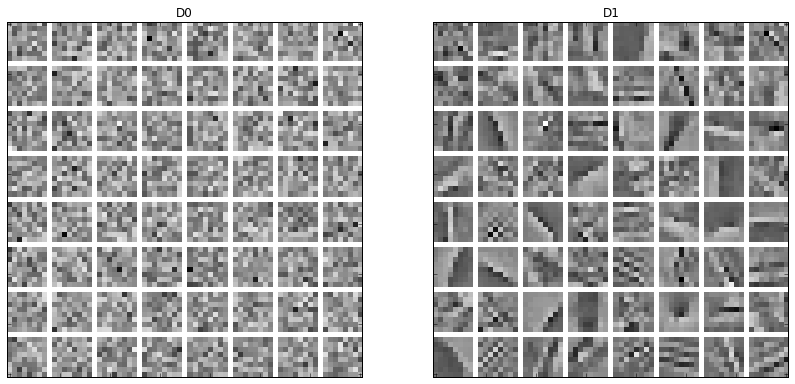

In [7]:
D1 = D1.squeeze()
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(util.tiledict(D0), title='D0', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(util.tiledict(D1), title='D1', fig=fig)
fig.show()

Get iterations statistics from solver object and plot functional value.

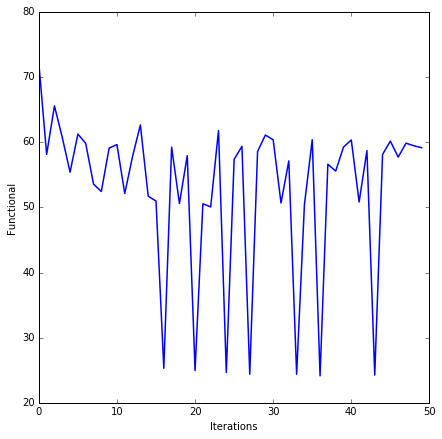

In [8]:
its = d.getitstat()
fig = plot.figure(figsize=(7, 7))
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', fig=fig)
fig.show()